In [4]:
import numpy as np
import theano as th
import theano.tensor as T
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from utils import get_preprocessed_data, error_rate

def convpool(X, W, b, poolsize=(2,2)):
    conv_out = T.nnet.conv2d(input=X, filters=W)
    
    pooled_out = T.signal.pool.pool_2d(
        input=conv_out,
        ws=poolsize,
        ignore_border=True
    )
    
    # Add the bias term. Since the bias is a vector 1D array), we first
    # reshape it to a tensor of shape (1, n_filters, 1, 1). Each bias will
    # thus be broadcasted across mini_batches and feature map
    return T.nnen.relu(pooled_out + b.dimshuffle('x', 0, 'x', 'x'))


def init_filter(shape):
    w = np.random.randn(shape) / np.sqrt(2.0 / np.prod(shape[1:]))
    return w.astype(np.float32)

def rearrange(X):
    # input is (N, 784)
    # output is (N, 28, 28)
    new_X = np.zeros((X.shape[0], 28, 28))
    for pixels_row, new_X_mat in zip(X, new_X):
        for j in range(28):
            new_X_mat[j] += pixels_row[j*28:(j+1)*28]

    return new_X

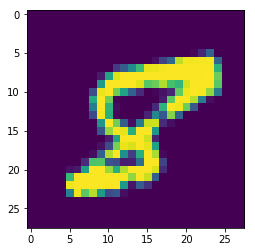

In [5]:
X, Y = get_preprocessed_data()
X = rearrange(X)

plt.imshow(X[0])

In [1]:
a = (1, 2, 3)

In [2]:
a

(1, 2, 3)

In [4]:
b = *a

SyntaxError: can't use starred expression here (<ipython-input-4-ae6bab21d242>, line 1)